In [55]:
# load pandas and read the csv file from the url
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# I don't know why it takes so long to load the data
df = pd.read_csv("./stack-overflow-developer-survey-2024/survey_results_public.csv", )

# let's take a look at the data
print(df.head())
print(df.describe())
print(df.info())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

we can see null values throughout all columns, few columns have filled with  full values.

now we will look into the data and see what we can do to clean it up and make it ready for analysis.

In [56]:
# start checking..
print(df['ResponseId'].head())
print(df['ResponseId'].tail())
print(df['ResponseId'].isnull().sum()) # no null values

# so response_id can be used as index
df.set_index('ResponseId', inplace=True) # setting index

0    1
1    2
2    3
3    4
4    5
Name: ResponseId, dtype: int64
65432    65433
65433    65434
65434    65435
65435    65436
65436    65437
Name: ResponseId, dtype: int64
0


In [57]:
# start checking..
print(df['MainBranch'].head())
print(df['MainBranch'].tail())
print(df['MainBranch'].isnull().sum()) # 0 null values
# create a value mapping for all catagorical data
value_maps = {}
# main_branch seems like a categorical data, asssign the unique values to the value_maps map to interger

value_maps['MainBranch'] = {v: i for i, v in enumerate(df['MainBranch'].dropna().unique())}
print(value_maps)
# map the values to the main_branch column
df['MainBranch'] = df['MainBranch'].map(value_maps['MainBranch'])


ResponseId
1    I am a developer by profession
2    I am a developer by profession
3    I am a developer by profession
4             I am learning to code
5    I am a developer by profession
Name: MainBranch, dtype: object
ResponseId
65433    I am a developer by profession
65434    I am a developer by profession
65435    I am a developer by profession
65436    I am a developer by profession
65437       I code primarily as a hobby
Name: MainBranch, dtype: object
0
{'MainBranch': {'I am a developer by profession': 0, 'I am learning to code': 1, 'I code primarily as a hobby': 2, 'I am not primarily a developer, but I write code sometimes as part of my work/studies': 3, 'I used to be a developer by profession, but no longer am': 4}}


In [58]:
# it seems like a categorical data, let's see the unique values
print(df['MainBranch'].value_counts())
# ok, its categorical data

MainBranch
0    50207
3     6511
1     3875
2     3334
4     1510
Name: count, dtype: int64


In [59]:
print(df['Age'].head())
print(df['Age'].tail())
print(df['Age'].isnull().sum()) # 0 null values

# mapping the age column
value_maps['Age'] = {v: i for i, v in enumerate(df['Age'].dropna().unique())}
df['Age'] = df['Age'].map(value_maps['Age'])
# age seems like a categorical data, let's see the unique values
print(df['Age'].value_counts())

ResponseId
1    Under 18 years old
2       35-44 years old
3       45-54 years old
4       18-24 years old
5       18-24 years old
Name: Age, dtype: object
ResponseId
65433    18-24 years old
65434    25-34 years old
65435    25-34 years old
65436    18-24 years old
65437    18-24 years old
Name: Age, dtype: object
0
Age
4    23911
1    14942
3    14098
2     6249
5     2575
0     2568
7      772
6      322
Name: count, dtype: int64


age is categorical data, we can keep it as it is. But I assume it represented register age/ working experience, not the actual age of the respondents

In [60]:
print(df['RemoteWork'].head())
print(df['RemoteWork'].tail())
print(df['RemoteWork'].isnull().sum())
print(df['RemoteWork'].value_counts())
# mapping the remote_work column
value_maps['RemoteWork'] = {v: i for i, v in enumerate(df['RemoteWork'].dropna().unique())}
df['RemoteWork'] = df['RemoteWork'].map(value_maps['RemoteWork'])

df['RemoteWork'] = df['RemoteWork'].fillna(0)# filling null values with 0
print(df['RemoteWork'].value_counts())

ResponseId
1    Remote
2    Remote
3    Remote
4       NaN
5       NaN
Name: RemoteWork, dtype: object
ResponseId
65433                                  Remote
65434                                  Remote
65435                               In-person
65436    Hybrid (some remote, some in-person)
65437                                     NaN
Name: RemoteWork, dtype: object
10631
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64
RemoteWork
0.0    31462
2.0    23015
1.0    10960
Name: count, dtype: int64


remote_work is categorical data, we can keep it as it is. And fill the null values with 0, meaning no remote work/experience

In [61]:
print(df['EdLevel'].head())
print(df['EdLevel'].tail())
print(df['EdLevel'].isnull().sum())
print(df['EdLevel'].value_counts())
# don't know what it is yet, but it seems categorical data, filling null with 0
df['EdLevel'] = df['EdLevel'].fillna(0)

ResponseId
1                            Primary/elementary school
2         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
3      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
4    Some college/university study without earning ...
5    Secondary school (e.g. American high school, G...
Name: EdLevel, dtype: object
ResponseId
65433         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
65434                                                  NaN
65435         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
65436    Secondary school (e.g. American high school, G...
65437                                                  NaN
Name: EdLevel, dtype: object
4653
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschul

ResponseId
1    Employed, full-time
2    Employed, full-time
3    Employed, full-time
4     Student, full-time
5     Student, full-time
Name: Employment, dtype: object
ResponseId
65433    Employed, full-time
65434    Employed, full-time
65435    Employed, full-time
65436    Employed, full-time
65437     Student, full-time
Name: Employment, dtype: object
0
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not emp

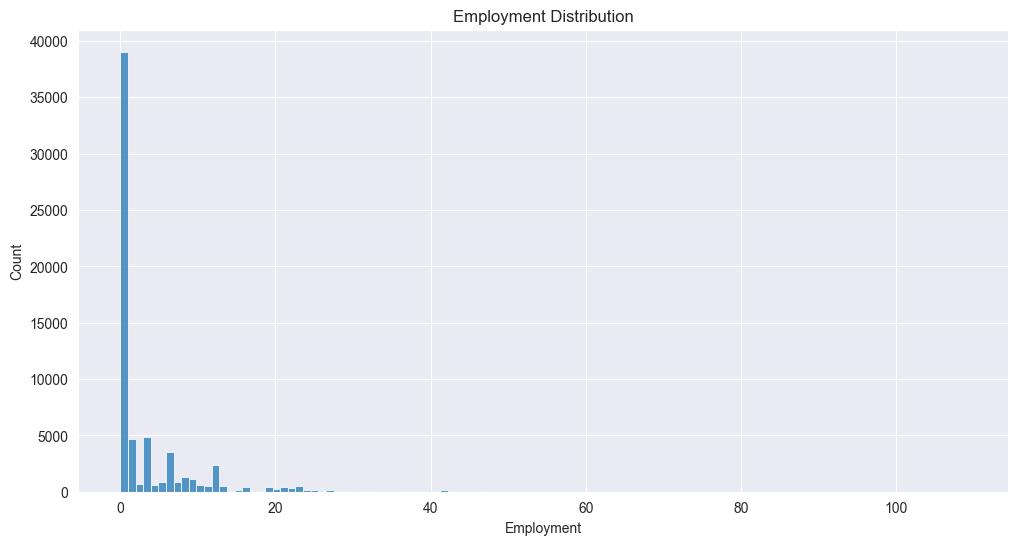

In [62]:
print(df['Employment'].head())
print(df['Employment'].tail())
print(df['Employment'].isnull().sum())
print(df['Employment'].value_counts())
# mapping the Employment column
value_maps['Employment'] = {v: i for i, v in enumerate(df['Employment'].dropna().unique())}
df['Employment'] = df['Employment'].map(value_maps['Employment'])
df['Employment'] = df['Employment'].fillna(0)
# plot distribution of Employment column

plt.figure(figsize=(12,6))
sns.histplot(df['Employment'], bins=len(df['Employment'].unique())+1, kde=False)
plt.title('Employment Distribution')
plt.xlabel('Employment')
plt.ylabel('Count')
plt.show()



In [63]:
print(df['years_code'].head())
print(df['years_code'].tail())
print(df['years_code'].isnull().sum())
print(df['years_code'].value_counts())
# ok, there are null values, and it seems categorical data, but the coding age range 0~50, we need to dive in deeper
#TODO previous 'age' column have higher chance to be a register age


KeyError: 'years_code'

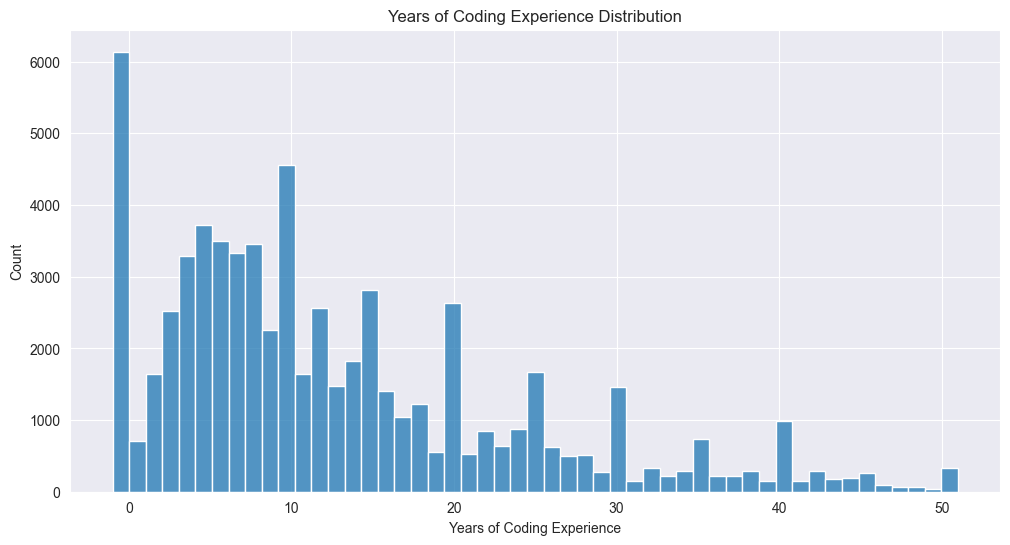

In [9]:

# plot the years_code value distribution, filled the null values with -1
year_code_origin = df['years_code'].copy()
df['years_code'] = df['years_code'].fillna(-1)
plt.figure(figsize=(12,6))
sns.histplot(df['years_code'], bins=51, kde=False)
plt.title('Years of Coding Experience Distribution')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Count')
plt.show()

1The distribution is right-skewed, with a significant number of respondents having less than 10 years of coding experience. There are also noticeable peaks at 10, 20, 30, 40, 50, which might indicate that some respondents rounded their experience to the nearest decade. The presence of a peak at -1 indicates that there are respondents who did not provide their years of coding experience.

response_id
1     NaN
2    17.0
3    27.0
4     NaN
5     NaN
Name: years_code_pro, dtype: float64
response_id
65433    3.0
65434    NaN
65435    5.0
65436    2.0
65437    NaN
Name: years_code_pro, dtype: float64
13827
years_code_pro
2.0     4168
3.0     4093
5.0     3526
10.0    3251
4.0     3215
0.0     2856
6.0     2843
1.0     2639
8.0     2549
7.0     2517
12.0    1777
15.0    1635
20.0    1549
9.0     1493
11.0    1312
13.0    1127
14.0    1082
25.0     998
16.0     946
18.0     867
17.0     814
30.0     689
24.0     632
19.0     516
22.0     492
23.0     448
26.0     426
27.0     380
21.0     380
28.0     342
35.0     285
29.0     196
40.0     194
32.0     194
34.0     169
38.0     134
33.0     132
36.0     119
31.0     106
37.0     104
45.0      56
42.0      55
39.0      54
41.0      51
51.0      50
44.0      42
43.0      37
46.0      21
50.0      14
48.0      14
49.0      11
47.0      10
Name: count, dtype: int64


Text(0.5, 0, 'Years of Professional Coding Experience')

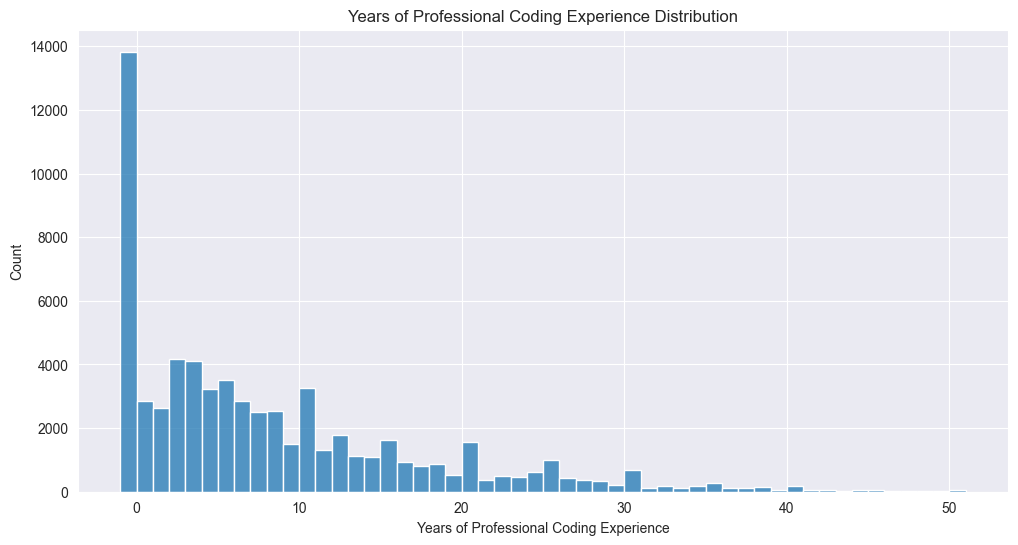

In [11]:
print(df['years_code_pro'].head())
print(df['years_code_pro'].tail())
print(df['years_code_pro'].isnull().sum())
print(df['years_code_pro'].value_counts())

# ok, there are null values, and it seems categorical data
years_code_pro_origin = df['years_code_pro'].copy()
df['years_code_pro'] = df['years_code_pro'].fillna(-1)
# plot the years_code_pro value distribution, filled the null values with -1
plt.figure(figsize=(12,6))
sns.histplot(df['years_code_pro'], bins=52, kde=False)
plt.title('Years of Professional Coding Experience Distribution')
plt.xlabel('Years of Professional Coding Experience')


response_id
1     NaN
2    16.0
3    10.0
4    16.0
5    16.0
Name: dev_type, dtype: float64
response_id
65433     2.0
65434     NaN
65435    18.0
65436    12.0
65437     NaN
Name: dev_type, dtype: float64
5992
dev_type
16.0    18260
12.0     9928
33.0     5102
15.0     3349
13.0     2493
26.0     2458
18.0     2021
14.0     1623
23.0     1275
1.0      1238
4.0      1118
6.0      1024
20.0     1019
29.0      943
32.0      837
17.0      706
3.0       634
34.0      552
11.0      543
19.0      525
5.0       523
28.0      418
31.0      356
21.0      355
30.0      332
22.0      310
27.0      290
2.0       235
10.0      224
24.0      200
8.0       182
7.0       171
9.0       105
25.0       96
Name: count, dtype: int64


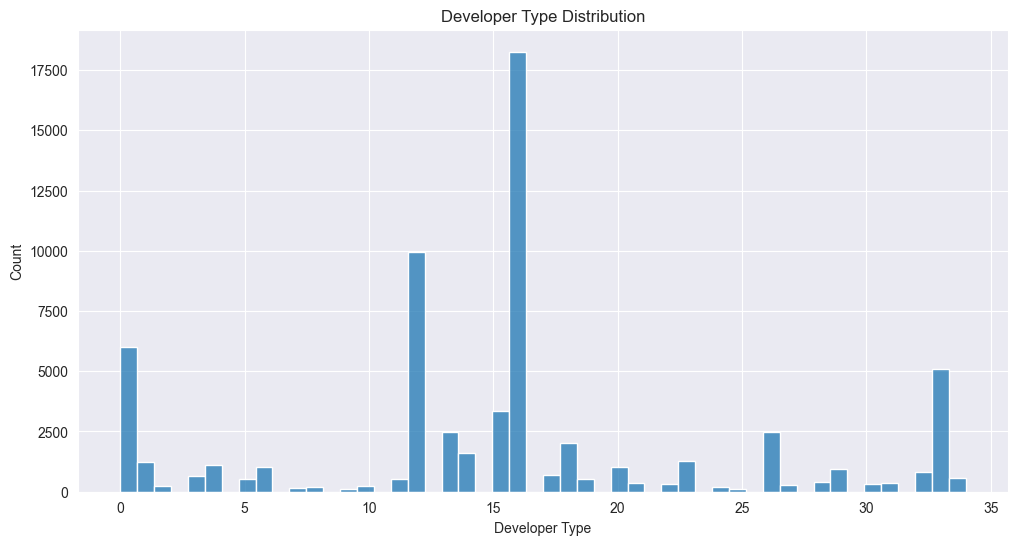

In [13]:
print(df['dev_type'].head())
print(df['dev_type'].tail())
print(df['dev_type'].isnull().sum())
print(df['dev_type'].value_counts())

# fillna with 0
df['dev_type'] = df['dev_type'].fillna(0)
# plot the dev_type value distribution
plt.figure(figsize=(12,6))
sns.histplot(df['dev_type'], bins=50, kde=False)
plt.title('Developer Type Distribution')
plt.xlabel('Developer Type')
plt.ylabel('Count')
plt.show()


response_id
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: org_size, dtype: float64
response_id
65433    5.0
65434    0.0
65435    1.0
65436    6.0
65437    0.0
Name: org_size, dtype: float64
0
org_size
0.0     17957
6.0      9754
4.0      8694
3.0      5558
1.0      5353
5.0      4833
2.0      4084
8.0      3183
10.0     3086
7.0      1867
9.0      1068
Name: count, dtype: int64


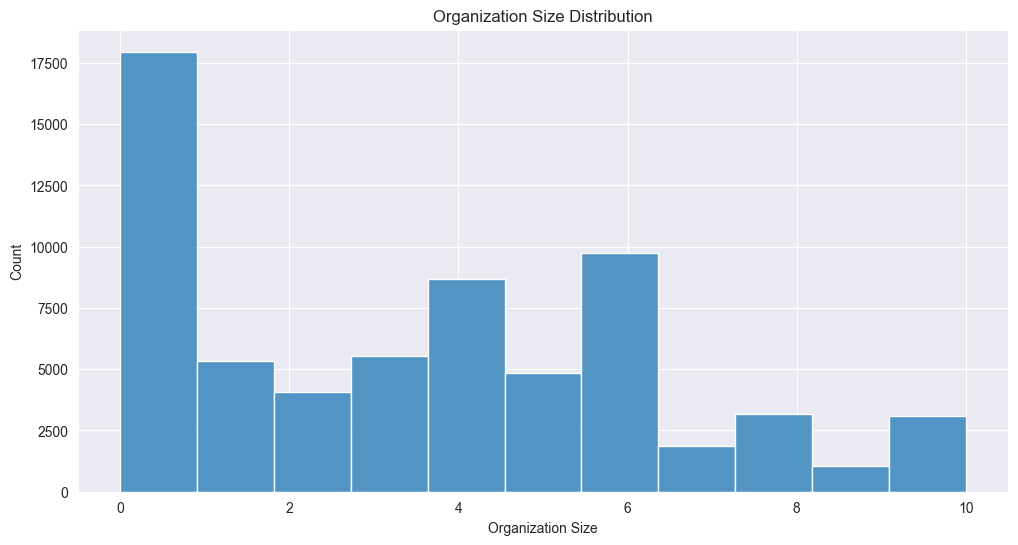

In [17]:
print(df['org_size'].head())
print(df['org_size'].tail())
print(df['org_size'].isnull().sum())
print(df['org_size'].value_counts())

# fillna with 0
df['org_size'] = df['org_size'].fillna(0)
# plot the org_size value distribution
plt.figure(figsize=(12,6))
sns.histplot(df['org_size'], bins=len(df['org_size'].unique()+1), kde=False)
plt.title('Organization Size Distribution')
plt.xlabel('Organization Size')
plt.ylabel('Count')
plt.show()
